<a href="https://colab.research.google.com/github/RiteshopShrivastava/Gold-Price-forecasting/blob/main/Gold_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Gold Price Prediction** 
**Objective :**- Forecasting gold price for next 30 days based on historical data.
(Considering last four years of historical data)

In [1]:
!pip install yfinance

     |████████████████████████████████| 6.4 MB 6.3 MB/s 
     |████████████████████████████████| 63 kB 1.5 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [2]:
import numpy as np
import pandas as pd
import yfinance as yf
from datetime import date
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [72]:
start='2018-01-01'
end=date.today().strftime('%Y-%m-%d')
data=yf.download('GC=F',start=start,end=end)

[*********************100%***********************]  1 of 1 completed


In [73]:
data=yf.download('GC=F',start=start,end=end)[['Adj Close']]
data

[*********************100%***********************]  1 of 1 completed


,Adj Close
Date,
2018-01-02,1313.699951
2018-01-03,1316.199951
2018-01-04,1319.400024
2018-01-05,1320.300049
2018-01-08,1318.599976
...,...
2022-01-03,1799.400024
2022-01-04,1814.000000
2022-01-05,1824.599976


In [74]:
data.rename(columns={"Adj Close": 'Price'},inplace=True)

In [75]:
data.head()

,Price
Date,
2018-01-02,1313.699951
2018-01-03,1316.199951
2018-01-04,1319.400024
2018-01-05,1320.300049
2018-01-08,1318.599976


In [76]:
data.tail()

,Price
Date,
2022-01-03,1799.400024
2022-01-04,1814.000000
2022-01-05,1824.599976
2022-01-06,1788.699951
2022-01-07,1797.000000


In [38]:
train = data.head(800)
test = data.tail(213)

## **EDA**

In [77]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1013 entries, 2018-01-02 to 2022-01-07
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Price   1013 non-null   float64
dtypes: float64(1)
memory usage: 15.8 KB


**Line chart**

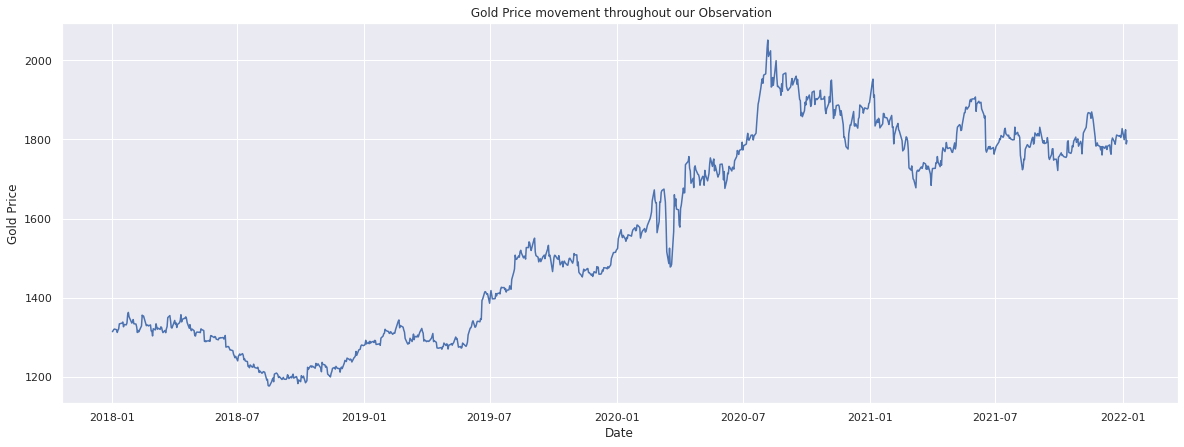

In [78]:
import seaborn as sns
plt.figure(figsize=(20,7))
sns.set(style='darkgrid')
sns.lineplot( y="Price", x="Date", data=data)
#sns.lineplot( y="Price", x=data.index, data=data)
plt.title(" Gold Price movement throughout our Observation")
plt.ylabel('Gold Price')
plt.show()

**Another Way to draw line chart**

In [ ]:
#from IPython.core.pylabtools import figsize
#plt.figure(figsize=(20,7))
#data.Price.plot()
#plt.title(" Gold Price movement throughout our Observation")
#plt.ylabel('Gold Price')
#plt.show()

In [80]:
data.isnull().sum()

Price    0
dtype: int64

In [81]:
print(len(data))

1013


In [82]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Price,1013.0,1560.023789,249.376143,1176.199951,1311.599976,1541.0,1792.699951,2051.5


### **Checking for Stationarity in data using Dickey-Fuller test**

In [83]:
X = data['Price'].values

result = adfuller(X)
#print(result)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
print(f'Inference: Time Series is {"non" if result[1]>=0.05 else" "} stationary')

ADF Statistic: -0.750097
p-value: 0.833343
Critical Values:
Inference: Time Series is non stationary


## **As the p-value > 0.05, we Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary.**

### **Auto correlation graph**

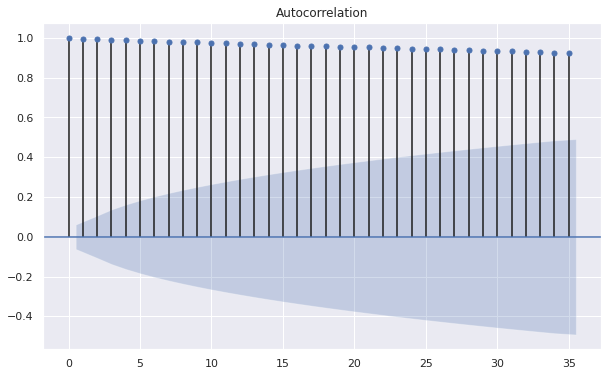

In [84]:
plt.rc("figure", figsize=(10,6))
plot_acf(data['Price'],lags=35)
plt.show()

### **PACF graph**

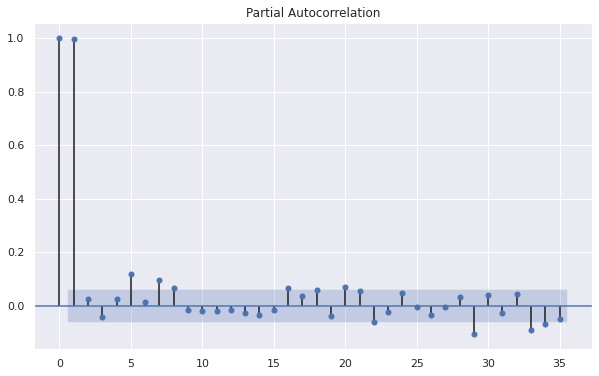

In [85]:
plot_pacf(data['Price'],lags=35)
plt.show()

## **DIFFERENCE TRANSFORM to remove Seasonality**

In [86]:
data_without_sea = data.diff().dropna()

In [154]:
data_without_sea

,Price
Date,
2018-01-03,2.500000
2018-01-04,3.200073
2018-01-05,0.900024
2018-01-08,-1.700073
2018-01-09,-6.900024
...,...
2022-01-03,-28.099976
2022-01-04,14.599976
2022-01-05,10.599976


In [87]:
data_without_sea.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1012 entries, 2018-01-03 to 2022-01-07
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Price   1012 non-null   float64
dtypes: float64(1)
memory usage: 15.8 KB


### **Again checking for Stationarity in data using Dickey-Fuller test**

In [88]:
X = data_without_sea['Price'].values
result = adfuller(X)
#print(result)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
print(f'Inference: Time Series is {"non" if result[1]>=0.05 else" "}stationary')

ADF Statistic: -14.784295
p-value: 0.000000
Critical Values:
Inference: Time Series is  stationary


### **Auto correlation graph after 1 step differencing**

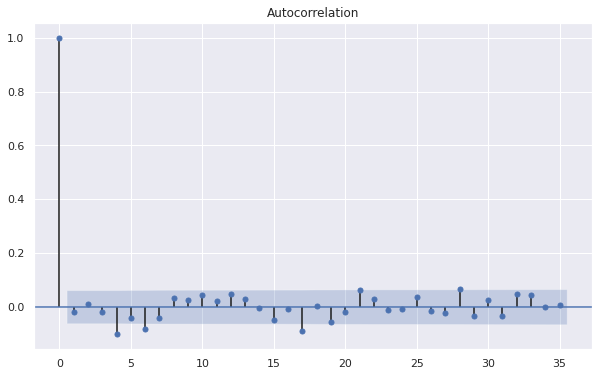

In [89]:
plt.rc("figure", figsize=(10,6))
plot_acf(data_without_sea['Price'], lags=35)
plt.show()

### **Partial Auto Correlation graph after differencing**

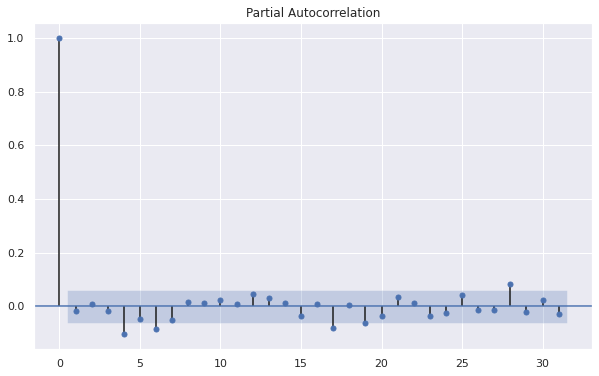

In [90]:
plt.rc("figure", figsize=(10,6))
plot_pacf(data_without_sea)
plt.show()

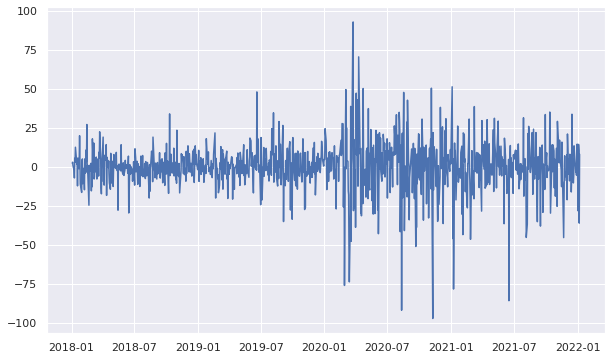

In [91]:
plt.plot(data_without_sea)
plt.show()

In [92]:
data_without_sea.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1012 entries, 2018-01-03 to 2022-01-07
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Price   1012 non-null   float64
dtypes: float64(1)
memory usage: 15.8 KB


In [93]:
train = data.head(800)
test = data.tail(212)

In [95]:
# separate out a validation dataset

print('Dataset %d, Validation %d' % (len(train), len(test)))
#train_data = pd.DataFrame(data_without_sea)
train.to_csv('dataset.csv', header=False)
test.to_csv('validation.csv', header=False)

Dataset 800, Validation 212


### **Persistence/ Base model**

In [96]:
# evaluate a persistence model
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from math import sqrt
# load data
train = read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
# prepare data
X = train.values
X = X.astype('float32')
train_size = int(len(X) * 0.70)
train, test = X[0:train_size], X[train_size:]

In [97]:
# walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(test)):
    yhat = history[-1]
    predictions.append(yhat)
# observation
    obs = test[i]
    history.append(obs)
    print('>Predicted=%.3f, Expected=%.3f' % (yhat, obs))
# report performance
rmse = sqrt(mean_squared_error(test, predictions))
print('RMSE: %.3f' % rmse)

>Predicted=1632.300, Expected=1650.100
>Predicted=1650.100, Expected=1623.900
>Predicted=1623.900, Expected=1622.000
>Predicted=1622.000, Expected=1583.400
>Predicted=1583.400, Expected=1578.200
>Predicted=1578.200, Expected=1625.700
>Predicted=1625.700, Expected=1633.700
>Predicted=1633.700, Expected=1677.000
>Predicted=1677.000, Expected=1664.800
>Predicted=1664.800, Expected=1665.400
>Predicted=1665.400, Expected=1736.200
>Predicted=1736.200, Expected=1744.800
>Predicted=1744.800, Expected=1756.700
>Predicted=1756.700, Expected=1727.200
>Predicted=1727.200, Expected=1720.400
>Predicted=1720.400, Expected=1689.200
>Predicted=1689.200, Expected=1701.600
>Predicted=1701.600, Expected=1678.200
>Predicted=1678.200, Expected=1728.700
>Predicted=1728.700, Expected=1733.300
>Predicted=1733.300, Expected=1723.500
>Predicted=1723.500, Expected=1711.900
>Predicted=1711.900, Expected=1710.500
>Predicted=1710.500, Expected=1703.400
>Predicted=1703.400, Expected=1684.200
>Predicted=1684.200, Expe

### **ARIMA Hyperparameters**

In [98]:
# grid search ARIMA parameters for a time series

import warnings
from pandas import read_csv
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt


# evaluate an ARIMA model for a given order (p,d,q) and return RMSE
def evaluate_arima_model(X, arima_order):
# prepare training dataset
    X = X.astype('float32')
    train_size = int(len(X) * 0.70)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
# make predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
# model_fit = model.fit(disp=0)
        model_fit = model.fit(disp=0)
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
# calculate out of sample error
    rmse = sqrt(mean_squared_error(test, predictions))
    return rmse

### **Grid search for p,d,q values**

In [99]:
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float('inf'), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse = evaluate_arima_model(train, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                    print('ARIMA%s RMSE=%.3f' % (order,rmse))
                except:
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))

In [100]:
# load dataset
train = read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
# evaluate parameters
p_values = range(0, 3)
d_values = range(0, 3)
q_values = range(0, 3)
warnings.filterwarnings("ignore")
evaluate_models(train.values, p_values, d_values, q_values)

ARIMA(0, 0, 0) RMSE=405.946
ARIMA(0, 0, 1) RMSE=213.837
ARIMA(0, 1, 0) RMSE=22.243
ARIMA(0, 1, 1) RMSE=22.310
ARIMA(0, 1, 2) RMSE=22.350
ARIMA(0, 2, 0) RMSE=32.960
ARIMA(0, 2, 1) RMSE=22.317
ARIMA(1, 0, 0) RMSE=22.268
ARIMA(1, 1, 0) RMSE=22.308
ARIMA(1, 2, 0) RMSE=27.028
ARIMA(1, 2, 1) RMSE=22.379
ARIMA(1, 2, 2) RMSE=22.422
ARIMA(2, 0, 0) RMSE=22.949
ARIMA(2, 1, 0) RMSE=22.345
ARIMA(2, 1, 1) RMSE=22.360
ARIMA(2, 2, 0) RMSE=26.214
Best ARIMA(0, 1, 0) RMSE=22.243


### **Build Model based on the optimized values**

In [101]:
# save finalized model to file
from pandas import read_csv
from statsmodels.tsa.arima_model import ARIMA
import numpy

In [145]:
# load data
train = read_csv('dataset.csv', header=0, index_col=0, parse_dates=True)
# prepare data
X = train.values
X = X.astype('float32')

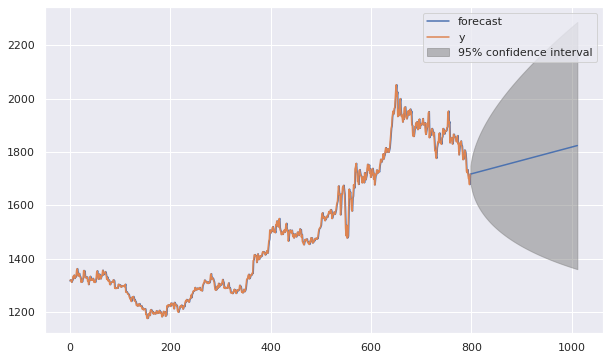

In [146]:
# fit model
model = ARIMA(X, order=(0,1,0))
model_fit = model.fit()
forecast=model_fit.forecast(steps=212)[0]
model_fit.plot_predict(1, 1012)
plt.show()

In [147]:
#Error on the test data
val=pd.read_csv('validation.csv',header=None)
rmse = sqrt(mean_squared_error(val[1], forecast))
rmse

56.560071006639305

In [148]:
val[1]

0      1722.300049
1      1719.500000
2      1728.900024
3      1730.599976
4      1726.800049
          ...     
207    1799.400024
208    1814.000000
209    1824.599976
210    1788.699951
211    1797.000000
Name: 1, Length: 212, dtype: float64

In [149]:
forecast

array([1717.10173   , 1717.60348442, 1718.10523884, 1718.60699325,
       1719.10874767, 1719.61050209, 1720.1122565 , 1720.61401092,
       1721.11576533, 1721.61751975, 1722.11927417, 1722.62102858,
       1723.122783  , 1723.62453742, 1724.12629183, 1724.62804625,
       1725.12980067, 1725.63155508, 1726.1333095 , 1726.63506392,
       1727.13681833, 1727.63857275, 1728.14032717, 1728.64208158,
       1729.143836  , 1729.64559042, 1730.14734483, 1730.64909925,
       1731.15085367, 1731.65260808, 1732.1543625 , 1732.65611692,
       1733.15787133, 1733.65962575, 1734.16138017, 1734.66313458,
       1735.164889  , 1735.66664342, 1736.16839783, 1736.67015225,
       1737.17190666, 1737.67366108, 1738.1754155 , 1738.67716991,
       1739.17892433, 1739.68067875, 1740.18243316, 1740.68418758,
       1741.185942  , 1741.68769641, 1742.18945083, 1742.69120525,
       1743.19295966, 1743.69471408, 1744.1964685 , 1744.69822291,
       1745.19997733, 1745.70173175, 1746.20348616, 1746.70524

### **Combine train and test data and build final model**

In [155]:
# fit model
#data = read_csv('data', header=0, index_col=0, parse_dates=True)
# prepare data
X = data.values
X = X.astype('float32')

In [156]:
model = ARIMA(X, order=(0,1,0))
model_fit = model.fit()

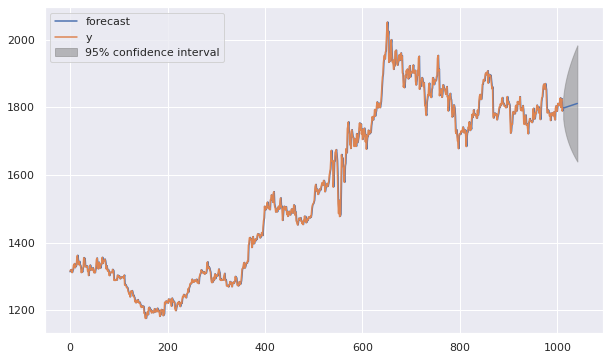

In [157]:
forecast_final=model_fit.forecast(steps=30)[0]
model_fit.plot_predict(1,1042)
plt.show()

In [158]:
forecast_final

array([1797.47756917, 1797.95513834, 1798.43270751, 1798.91027669,
       1799.38784586, 1799.86541503, 1800.3429842 , 1800.82055337,
       1801.29812254, 1801.77569172, 1802.25326089, 1802.73083006,
       1803.20839923, 1803.6859684 , 1804.16353757, 1804.64110674,
       1805.11867592, 1805.59624509, 1806.07381426, 1806.55138343,
       1807.0289526 , 1807.50652177, 1807.98409095, 1808.46166012,
       1808.93922929, 1809.41679846, 1809.89436763, 1810.3719368 ,
       1810.84950598, 1811.32707515])